In [28]:
## Parie 3-1

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns; sns.set()  # for plot styling
from scipy.stats import mode
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from time import time

In [29]:
X = np.load("./MNIST_X_28x28.npy")
y = np.load("./MNIST_y.npy")

In [30]:
n_digits = 10
n_clusters = 10
train_size = 0.7
n_components = 0.9

# Split/Flatten des images

In [31]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=1-train_size, random_state=42)

X_ftrain = X_train.flatten().reshape(X_train.shape[0], 784)
X_ftest  = X_test.flatten().reshape(X_test.shape[0], 784)

# PCA

In [25]:
pca = PCA(n_components = n_components)
test = pca.fit(X_ftrain)
X_pca_train = pca.transform(X_ftrain)
X_pca_test = pca.transform(X_ftest)
print(X_pca_train.shape, X_pca_test.shape)
test.components_.shape

(48999, 87) (21001, 87)


(87, 784)

# Fonctions

In [26]:
def display_confusion_matrix(y, pred):
    mat = confusion_matrix(y, pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels="0123456789",
            yticklabels="0123456789")
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

def results(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    display_confusion_matrix(y_test, pred)
    print("score : ", clf.score(X_test, y_test))
    

# Apprentissage supervisé

## Logistic Regression

C:\Users\maiso\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


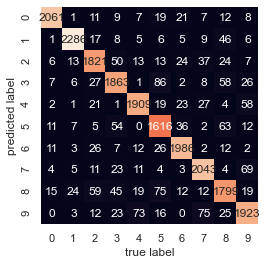

score :  0.9193371744202657


In [12]:
model = LogisticRegression(solver = 'lbfgs', penalty ='l2')
results(model, X_ftrain, y_train, X_ftest, y_test)

### PCA

C:\Users\maiso\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


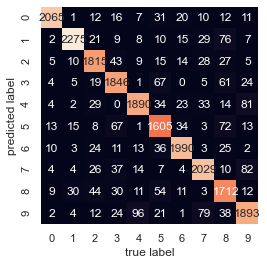

score :  0.9104328365315937


In [27]:
model = LogisticRegression()
results(model, X_pca_train, y_train, X_pca_test, y_test)

### Test pour différentes valeurs de C

In [ ]:
Ly = []
Lx = []
for i in range(1,11):
    model = LogisticRegression(solver = 'lbfgs', C = 0.1*i, penalty ='l2')
    model.fit(X_ftrain, y_train)
    Ly.append(model.score(X_ftrain, y_train))
    Lx.append(0.1*i)
plt.scatter(Lx, Ly, cmap='viridis')
plt.show()

## Naive Bayes Classifier

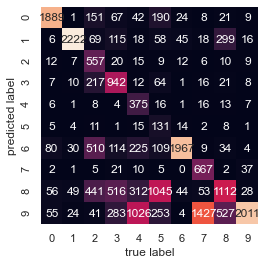

score :  0.56535403076044


In [13]:
model = GaussianNB()
results(model, X_ftrain, y_train, X_ftest, y_test)

### Données avec PCA

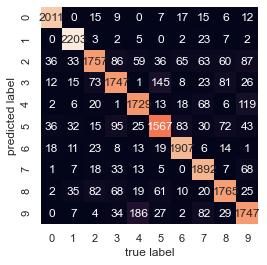

score :  0.8725774963096995


In [16]:
model = GaussianNB()
results(model, X_pca_train, y_train, X_pca_test, y_test)

## SVC

### Données non réduites

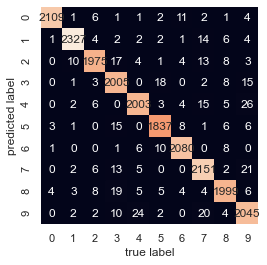

score :  0.9776201133279367


In [14]:
model = SVC()
results(model, X_ftrain, y_train, X_ftest, y_test)

### Données avec PCA

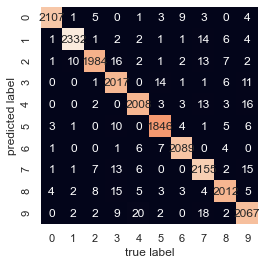

score :  0.9817151564211228


In [15]:
model = SVC()
results(model, X_pca_train, y_train, X_pca_test, y_test)